In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [4]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

--2022-09-06 06:39:48--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-09-06 06:39:48--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz.1’

korean-e

In [5]:
!tar -xzvf korean-english-park.train.tar.gz

korean-english-park.train.en
korean-english-park.train.ko


In [6]:
path_to_file = '/content/korean-english-park.train.ko'
with open(path_to_file, 'r') as f:
  raw = f.read().splitlines()

print('Data size : ', len(raw))

Data size :  94123


In [7]:
print('Example : ')
for sen in raw[0:100][::20]:print('>>', sen)

Example : 
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [8]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  # if length == 1:
  #   print(sen)
  sum_len += length

print('문장의 최단길이 : ', min_len)
print('문장의 최장길이 : ', max_len)
print('문장의 평균길이 : ', sum_len//len(raw))

문장의 최단길이 :  1
문장의 최장길이 :  377
문장의 평균길이 :  60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


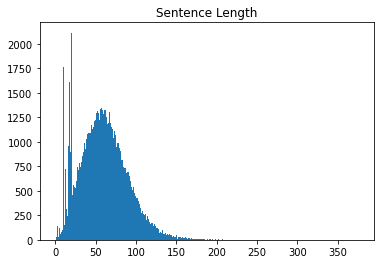

In [9]:
sentence_len = np.zeros((max_len), dtype=np.int)
for sen in raw:
  sentence_len[len(sen)-1]+=1

plt.bar(range(max_len), sentence_len, width = 1.0)
plt.title('Sentence Length')
plt.show()

In [10]:
def check_sen_with_len(raw, length):
  cnt = 0
  for sen in raw:
    if len(sen) == length:
      print(sen)
      cnt +=1
      if cnt > 100:return

In [11]:
check_sen_with_len(raw, 377)

throwaway 사용 후 버리는  / cell phone 이동 전화, 휴대폰  / be set to do 할 준비가 되어있다  / make one's debut 처음 소개되다  / convenience store 편의점   / shelve 선반, (상품) 진열대  / aisle 길다란 통로  / down the aisle from  이 있는 통로 아랫쪽에  / razor 면도기  / beef jerky 말린 쇠고기  / disposable camera 일회용 카메라  / seek 하려고 애쓰다  / emulate 에 지지 않으려고 애쓰다, 겨루다  / spur-of-the-moment 충동적인  / consumer 소비자  / purchase 구매, 구매품 번역 :


In [12]:
for idx, _sum in enumerate(sentence_len):
  if _sum > 1500:
    print('outlire idx : ', idx+1)

outlire idx :  11
outlire idx :  19
outlire idx :  21


In [13]:
check_sen_with_len(raw, 10)

선례가 하나 있다.
이것이 사실일까요?
당연시 될 것이다.
오차범위는 없었다.
여러분은 이 동물이
다칠 위험이 적다.
3월’’ ''안경:
1. 장난감 만들기
5. 운동 트레이너
6. 이벤트 기획자
-순간순간을 즐기기
2. 레스토랑 점원
5.어미니의 실수:
웃는 얼굴을 한다:
*홍역, 이하선염:
* 여행자의 질병:
무료 무선 인터넷:
숙박비 카드 결재:
무료 인터넷 사용:
무료 무선 인터넷:
친절하게 대화한다.
생후 24개월까지:
휘드비섬, 워싱턴주
환영한다 진행자들！
요가호텔 숙박비 :
당신 삶을 바꿔라.
“아이를 만드세요…
그는 "올슨은 매우
또한 ‘트랜스포머:
대학탐방은 이렇다.
마지막 곤돌라였다.
-반으로 줄인 무게
▶관련 동영상 보기
친숙하게 들리나요?
▶관련 동영상 보기
그의 저서 ‘행복;
* 등을 두드려라.
▶관련 동영상 보기
그의 근육질 어깨.
왜 인간은 이럴까?
그래서 다시 쐈다.
▶관련 동영상 보기
틸트로터, 헬기니?
스타벅스쿠폰 무료!
틸트로터, 헬기니?
메일 한통이 만드는
틸트로터, 헬기니?
틸트로터, 헬기니?
틸트로터, 헬기니?
이 건물은 추하다.
이 건물은 추하다.
메일 한통이 만드는
메일 한통이 만드는
틸트로터, 헬기니?
틸트로터, 헬기니?
모스크바의 밤 풍경
메일 한통이 만드는
위태로운 일자리 수
위태로운 일자리 수
메일 한통이 만드는
틸트로터, 헬기니?
틸트로터, 헬기니?
고프섬은 무인도다.
고프섬은 무인도다.
메일 한통이 만드는
개야”라고 외쳤다.
개야”라고 외쳤다.
햄의 지금 심정은?
틸트로터, 헬기니?
메일 한통이 만드는
메일 한통이 만드는
스타벅스쿠폰 무료!
틸트로터, 헬기니?
메일 한통이 만드는
메일 한통이 만드는
스타벅스쿠폰 무료!
日, 경기침체 심화
메일 한통이 만드는
틸트로터, 헬기니?
selloff 주가
왕의 귀환”입니다.
식별, 판별, 분간
mortar 박격포
비난, 고소, 고발
적대, 대립, 항쟁
epic 서사시적인
“ 폴 하비입니다.
결심, 결의, 해답
고맙습니다, 리타.
6살의 아이처럼…”
운에 맡기고 해보다

In [14]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print('data size : ', len(cleaned_corpus))

for sen in cleaned_corpus:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  # if length == 1:
  #   print(sen)
  sum_len += length

print('문장의 최단길이 : ', min_len)
print('문장의 최장길이 : ', max_len)
print('문장의 평균길이 : ', sum_len//len(cleaned_corpus))

data size :  77591
문장의 최단길이 :  1
문장의 최장길이 :  377
문장의 평균길이 :  64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


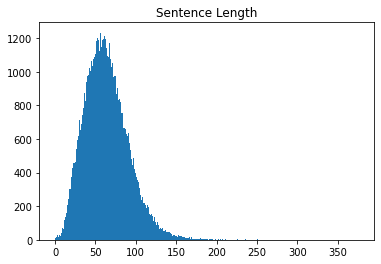

In [15]:
sentence_len = np.zeros((max_len), dtype=np.int)
for sen in cleaned_corpus:
  sentence_len[len(sen)-1]+=1

plt.bar(range(max_len), sentence_len, width = 1.0)
plt.title('Sentence Length')
plt.show()

76908


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


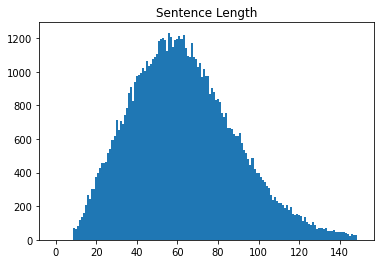

In [16]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]
print(len(filtered_corpus))
sentence_len = np.zeros((max_len), dtype=np.int)
for sen in filtered_corpus:
  sentence_len[len(sen)-1]+=1

plt.bar(range(max_len), sentence_len, width = 1.0)
plt.title('Sentence Length')
plt.show()

In [35]:
def tokenize(corpus):
  tokenizer = tf.keras.preprocessing.text.Tokenizer()
  tokenizer.fit_on_texts(corpus)
  word_index = tokenizer.word_index

  tensor = tokenizer.texts_to_sequences(corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding = 'post')
  return tensor, tokenizer

In [18]:
split_corpus = []

for kor in filtered_corpus:
  split_corpus.append(kor.split())


In [19]:
print(split_corpus[:5])

[['검찰은', '주가조작', '혐의로', '영국계', '펀드에게', '73억원의', '벌금을', '부과했다.'], ['그는', '이어', '"이같은', '상황에서', '테러', '조직에', '대항하는', '군사', '활동을', '지속하면서', '해결방안들을', '채택하기로', '결정했다”며', '"하마스', '정부에', '대한', '제한', '조치를', '더욱', '강화할', '것"이라고', '덧붙였다.'], ['알라위', '전', '총리는', '“시국상황이', '불안한', '이라크를', '평화롭고', '민주적인', '국가로', '바꾸기', '위해', '내게', '주어진', '역할을', '할', '것”이라고', '전했다.'], ['울머', '감독', '사망', '5일', '후', '자메이카의', '병리학자는', '그가', '목이', '졸려', '질식사했다고', '판명해', '혼란이', '일어났다.'], ['비', '담배산업', '관련', '변호사들은', 'FDA가', '월권을', '하고', '있는', '것일지도', '모른다고', '생각한다.']]


In [20]:
word_idx, split_tensor, split_tokenizer = tokenize(split_corpus)
print('split vocab size : ', len(split_tokenizer.index_word))

split vocab size :  237435


In [23]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-09-06 06:40:16--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.1, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0.996-ko-0.9.2.tar.gz%22&response

In [45]:
from konlpy.tag import Mecab
def mecab_split(sentence):
  # mecab = Mecab()
  return Mecab().morphs(sentence)

In [46]:
mecab_corpus = []
for k in filtered_corpus:
  mecab_corpus.append(mecab_split(k))

In [ ]:
display(mecab_corpus)

In [37]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print('mecab vocab size : ', len(mecab_tokenizer.index_word))

mecab vocab size :  52279


In [50]:
print(mecab_tensor[100])

[  398     6  5235 20708     4    50   140   228     6  1855   877   111
     4   782    57  1973    29     5  3555  2741    37    44    75     2
    50    12    72     2     1     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0]


In [78]:
temp = [mecab_tensor[100]]

In [84]:
temp

[array([  398,     6,  5235, 20708,     4,    50,   140,   228,     6,
         1855,   877,   111,     4,   782,    57,  1973,    29,     5,
         3555,  2741,    37,    44,    75,     2,    50,    12,    72,
            2,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0], dtype=int32)]

In [77]:
list(mecab_tensor[100])

[398,
 6,
 5235,
 20708,
 4,
 50,
 140,
 228,
 6,
 1855,
 877,
 111,
 4,
 782,
 57,
 1973,
 29,
 5,
 3555,
 2741,
 37,
 44,
 75,
 2,
 50,
 12,
 72,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [70]:
# Case 1 : mecab_tokenizer.sequences_to_texts() # 숫자 -> 텍스트

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
# mecab_tokenizer.sequences_to_texts()

print(texts[0]) # string

호주 의 데비 베이츠 는 " 두 아이 의 엄마 로서 나 는 당신 에게 일어난 일 을 상상 조차 할 수 없 다 " 고 전했 다 .


In [72]:
# Case 2 : mecab_tokenizer.index_word[]

sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + ' '

print(sentence)

호주 의 데비 베이츠 는 " 두 아이 의 엄마 로서 나 는 당신 에게 일어난 일 을 상상 조차 할 수 없 다 " 고 전했 다 . 
